#**Mount Drive and Read Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
 import pandas as pd

In [ ]:
train = pd.read_csv('gdrive/My Drive/AI_Project/covid19.csv');

#**Show Dataset**

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,Afghanistan,4033,115,502,255,2.85,12.45,38928341
1,Albania,856,31,627,6,3.62,73.25,2877800
2,Algeria,5558,494,2546,189,8.89,45.81,43851043
3,Andorra,754,48,545,2,6.37,72.28,77265
4,Angola,43,2,13,0,4.65,30.23,32866268


#**Show Shape**

In [ ]:
train.shape

(188, 8)

#**Show All Information with missing Value**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                188 non-null    object 
 1   Confirmed              188 non-null    int64  
 2   Deaths                 188 non-null    int64  
 3   Recovered              188 non-null    int64  
 4   New Cases              188 non-null    int64  
 5   Deaths / 100 Cases     188 non-null    float64
 6   Recovered / 100 Cases  188 non-null    float64
 7   Population             188 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 11.9+ KB


#**Categorizing (New Cases) in different range**
Normal Situation = 0,
 Bad Situation = 1,
 Very Bad Situation = 2,
 Extremely Bad Situation = 3

In [ ]:
train_test_data = [train]
for dataset in train_test_data:
  dataset.loc[ dataset['New Cases'] <= 50, 'New Cases'] = 0
  dataset.loc[(dataset['New Cases'] > 50) & (dataset['New Cases'] <= 250), 'New Cases'] = 1
  dataset.loc[(dataset['New Cases'] > 250) & (dataset['New Cases'] <= 550), 'New Cases'] = 2
  dataset.loc[ dataset['New Cases'] > 550, 'New Cases'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,Afghanistan,4033,115,502,2,2.85,12.45,38928341
1,Albania,856,31,627,0,3.62,73.25,2877800
2,Algeria,5558,494,2546,1,8.89,45.81,43851043
3,Andorra,754,48,545,0,6.37,72.28,77265
4,Angola,43,2,13,0,4.65,30.23,32866268


#**Import library for data visualization**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#**Create a function to see the graph**

In [ ]:
def bar_chart(feature):
  Normal_Situation = train[train['New Cases']==0][feature].value_counts()
  Bad_Situation = train[train['New Cases']==1][feature].value_counts()
  Very_Bad_Situation = train[train['New Cases']==2][feature].value_counts()
  Extremely_Bad_Situation = train[train['New Cases']==3][feature].value_counts()
  df = pd.DataFrame([Normal_Situation,Bad_Situation,Very_Bad_Situation, Extremely_Bad_Situation])
  df.index = ['Normal_Situation','Bad_Situation', 'Very_Bad_Situation', 'Extremely_Bad_Situation']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

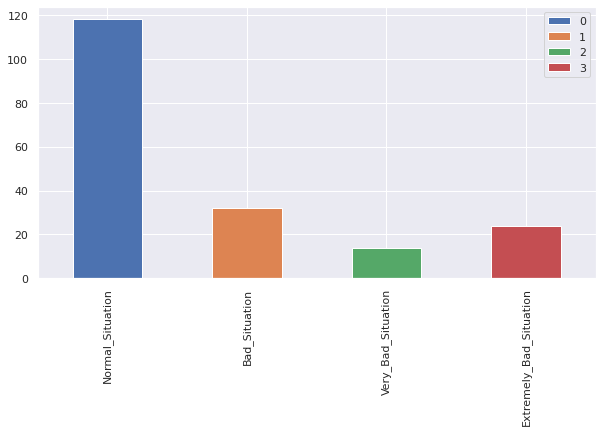

In [ ]:
bar_chart('New Cases')

In [ ]:
country_mapping = {"Afghanistan": 0, "Albania": 0, "Algeria": 0, "Andorra": 0, "Angola": 0, "Antigua and Barbuda": 0, "Argentina": 0, "Armenia": 0, "Australia": 0, "Austria": 0, "Azerbaijan": 0
                   , "Bahamas": 0, "Bahrain": 0, "Bangladesh": 0, "Barbados": 0, "Belarus": 0, "Belgium": 0, "Belize": 0, "Benin": 0, "Bhutan": 0, "Bolivia": 0, "Bosnia and Herzegovina": 0
                   , "Botswana": 0, "Brazil": 0, "Brunei": 0, "Bulgaria": 0, "Burkina Faso": 0, "Burma": 0, "Burundi": 0, "Cabo Verde": 1, "Cambodia": 1, "Cameroon": 1, "Canada": 1
                   , "Central African Republic": 1, "Chad": 1, "Chile": 1, "China": 1, "Colombia": 1, "Comoros": 1, "Congo (Brazzaville)": 1, "Congo (Kinshasa)": 1, "Costa Rica": 1, "Cote d'Ivoire": 1
                   , "Croatia": 1, "Cuba": 1, "Cyprus": 1, "Czechia": 1, "Denmark": 1, "Diamond Princess": 1, "Djibouti": 1, "Dominica": 1, "Dominican Republic": 1, "Ecuador": 2, "Egypt": 2
                   , "El Salvador": 2, "Equatorial Guinea": 2, "Eritrea": 2, "Estonia": 2, "Eswatini": 2, "Ethiopia": 2, "Fiji": 2, "Finland": 2, "France": 2, "Gabon": 3, "Gambia": 3, "Georgia": 3
                   , "Germany": 3, "Ghana": 3, "Greece": 3, "Grenada": 3, "Guatemala": 3, "Guinea": 3, "Guinea-Bissau": 3, "Guyana": 3, "Haiti": 3, "Holy See": 3, "Honduras": 3, "Hungary": 3
                   , "Iceland": 4, "India": 4, "Indonesia": 4, "Iran": 4, "Iraq": 4, "Ireland": 4, "Israel": 4, "Italy": 4, "Jamaica": 4, "Japan": 4, "Jordan": 4, "Kazakhstan": 5, "Kenya": 5
                   , "Korea, South": 5, "Kosovo": 5, "Kuwait": 5, "Kyrgyzstan": 5, "Laos": 5, "Latvia": 5, "Lebanon": 5, "Lesotho": 5, "Liberia": 5, "Libya": 5, "Liechtenstein": 5, "Lithuania": 5
                   , "Luxembourg": 5, "MS Zaandam": 6, "Madagascar": 6, "Malawi": 6, "Malaysia": 6, "Maldives": 6, "Mali": 6, "Malta": 6, "Mauritania": 6, "Mauritius": 6, "Mexico": 6, "Moldova": 6
                   , "Monaco": 6, "Mongolia": 6, "Montenegro": 6, "Morocco": 6, "Mozambique": 6, "Namibia": 6, "Nepal": 6, "Netherlands": 6, "New Zealand": 6, "Nicaragua": 6, "Niger": 6, "Nigeria": 6
                   , "North Macedonia": 6, "Norway": 6, "Oman": 0, "Pakistan": 7, "Panama": 7, "Papua New Guinea": 7, "Paraguay": 7, "Peru": 7, "Philippines": 7, "Poland": 7, "Portugal": 7, "Qatar": 7
                   , "Romania": 8, "Russia": 8, "Rwanda": 8, "Saint Kitts and Nevis": 8, "Saint Lucia": 8, "Saint Vincent and the Grenadines": 8, "San Marino": 8, "Sao Tome and Principe": 8, "Saudi Arabia": 8
                   , "Senegal": 8, "Serbia": 8, "Seychelles": 8, "Sierra Leone": 8, "Singapore": 8, "Slovakia": 8, "Slovenia": 8, "Somalia": 8, "South Africa": 8, "South Sudan": 8, "Spain": 8
                   , "Sri Lanka": 8, "Sudan": 8, "Suriname": 8, "Sweden": 8, "Switzerland": 8, "Syria": 8, "Taiwan*": 9, "Tajikistan": 9, "Tanzania": 9, "Thailand": 9, "Timor-Leste": 9, "Togo": 9
                   , "Trinidad and Tobago": 9, "Tunisia": 9, "Turkey": 9, "US": 9, "Uganda": 9, "Ukraine": 9, "United Arab Emirates": 9, "United Kingdom": 9, "Uruguay": 9, "Uzbekistan": 9, "Venezuela": 10
                   , "Vietnam": 10, "West Bank and Gaza": 10, "Western Sahara": 10, "Yemen": 11, "Zambia": 11, "Zimbabwe": 11}


In [ ]:
for dataset in train_test_data:
  dataset['Country'] = dataset['Country'].map(country_mapping)

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,4033,115,502,2,2.85,12.45,38928341
1,0,856,31,627,0,3.62,73.25,2877800
2,0,5558,494,2546,1,8.89,45.81,43851043
3,0,754,48,545,0,6.37,72.28,77265
4,0,43,2,13,0,4.65,30.23,32866268


#**Categorizing (Confirmed) in different range**


In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Confirmed'] <= 7000, 'Confirmed'] = 0
  dataset.loc[(dataset['Confirmed'] > 7000) & (dataset['Confirmed'] <= 20000), 'Confirmed'] = 1
  dataset.loc[(dataset['Confirmed'] > 20000) & (dataset['Confirmed'] <= 50000), 'Confirmed'] = 2
  dataset.loc[ dataset['Confirmed'] > 50000, 'Confirmed'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,0,115,502,2,2.85,12.45,38928341
1,0,0,31,627,0,3.62,73.25,2877800
2,0,0,494,2546,1,8.89,45.81,43851043
3,0,0,48,545,0,6.37,72.28,77265
4,0,0,2,13,0,4.65,30.23,32866268


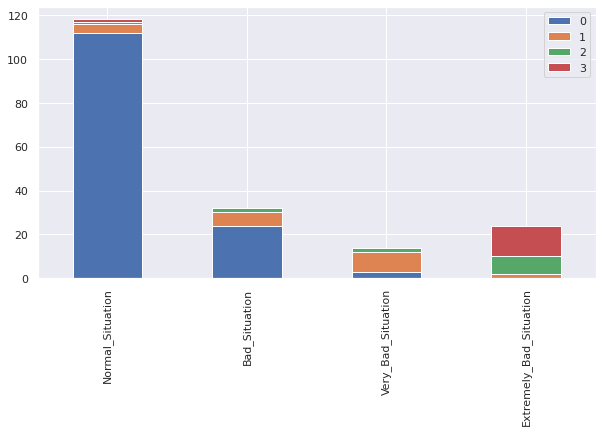

In [ ]:
bar_chart('Confirmed')

#**Categorizing (Deaths) in different range**

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Deaths'] <= 500, 'Deaths'] = 0
  dataset.loc[(dataset['Deaths'] > 500) & (dataset['Deaths'] <= 2000), 'Deaths'] = 1
  dataset.loc[(dataset['Deaths'] > 2000) & (dataset['Deaths'] <= 5000), 'Deaths'] = 2
  dataset.loc[ dataset['Deaths'] > 5000, 'Deaths'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,0,0,502,2,2.85,12.45,38928341
1,0,0,0,627,0,3.62,73.25,2877800
2,0,0,0,2546,1,8.89,45.81,43851043
3,0,0,0,545,0,6.37,72.28,77265
4,0,0,0,13,0,4.65,30.23,32866268


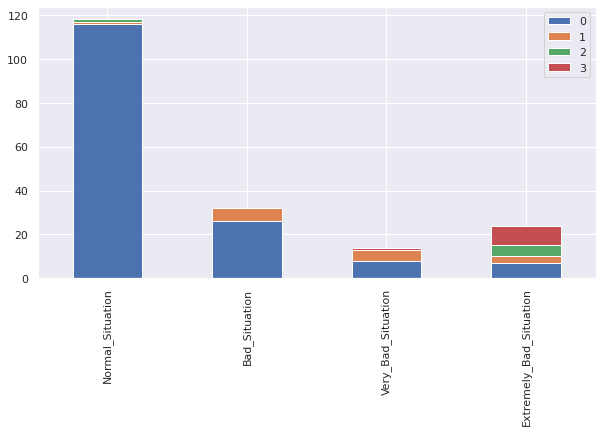

In [ ]:
bar_chart('Deaths')

#**Categorizing (Recovered) in different range**

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Recovered'] <= 10000, 'Recovered'] = 0
  dataset.loc[(dataset['Recovered'] > 10000) & (dataset['Recovered'] <= 30000), 'Recovered'] = 1
  dataset.loc[(dataset['Recovered'] > 30000) & (dataset['Recovered'] <= 50000), 'Recovered'] = 2
  dataset.loc[ dataset['Recovered'] > 50000, 'Recovered'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,0,0,0,2,2.85,12.45,38928341
1,0,0,0,0,0,3.62,73.25,2877800
2,0,0,0,0,1,8.89,45.81,43851043
3,0,0,0,0,0,6.37,72.28,77265
4,0,0,0,0,0,4.65,30.23,32866268


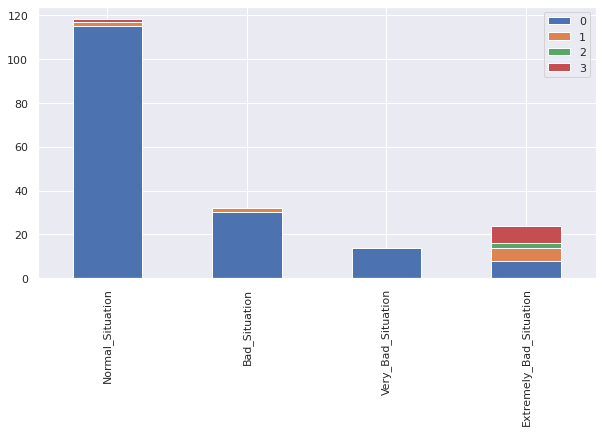

In [ ]:
bar_chart('Recovered')

#**Categorizing (Deaths / 100 Cases) in different range**

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Deaths / 100 Cases'] <= 2, 'Deaths / 100 Cases'] = 0
  dataset.loc[(dataset['Deaths / 100 Cases'] > 2) & (dataset['Deaths / 100 Cases'] <= 5), 'Deaths / 100 Cases'] = 1
  dataset.loc[(dataset['Deaths / 100 Cases'] > 5) & (dataset['Deaths / 100 Cases'] <= 8), 'Deaths / 100 Cases'] = 2
  dataset.loc[ dataset['Deaths / 100 Cases'] > 8, 'Deaths / 100 Cases'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,0,0,0,2,1.0,12.45,38928341
1,0,0,0,0,0,1.0,73.25,2877800
2,0,0,0,0,1,3.0,45.81,43851043
3,0,0,0,0,0,2.0,72.28,77265
4,0,0,0,0,0,1.0,30.23,32866268


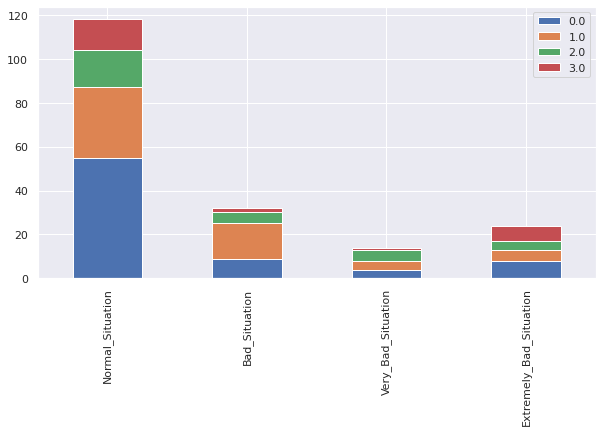

In [ ]:
bar_chart('Deaths / 100 Cases')

#**Categorizing (Recovered / 100 Cases) in different range**

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Recovered / 100 Cases'] <= 20, 'Recovered / 100 Cases'] = 0
  dataset.loc[(dataset['Recovered / 100 Cases'] > 20) & (dataset['Recovered / 100 Cases'] <= 40), 'Recovered / 100 Cases'] = 1
  dataset.loc[(dataset['Recovered / 100 Cases'] > 40) & (dataset['Recovered / 100 Cases'] <= 70), 'Recovered / 100 Cases'] = 2
  dataset.loc[ dataset['Recovered / 100 Cases'] > 70, 'Recovered / 100 Cases'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,0,0,0,2,1.0,0.0,38928341
1,0,0,0,0,0,1.0,3.0,2877800
2,0,0,0,0,1,3.0,2.0,43851043
3,0,0,0,0,0,2.0,3.0,77265
4,0,0,0,0,0,1.0,1.0,32866268


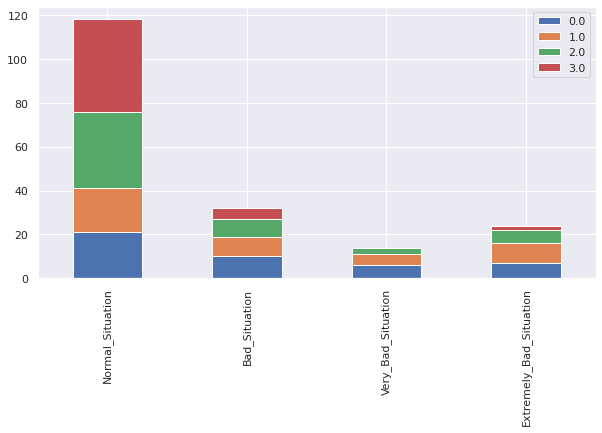

In [ ]:
bar_chart('Recovered / 100 Cases')

#**Categorizing (Population) in different range**

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Population'] <= 50000000, 'Population'] = 0
  dataset.loc[(dataset['Population'] > 50000000) & (dataset['Population'] <= 200000000), 'Population'] = 1
  dataset.loc[(dataset['Population'] > 200000000) & (dataset['Population'] <= 400000000), 'Population'] = 2
  dataset.loc[ dataset['Population'] > 400000000, 'Population'] = 3

In [ ]:
train.head()

,Country,Confirmed,Deaths,Recovered,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Population
0,0,0,0,0,2,1.0,0.0,0
1,0,0,0,0,0,1.0,3.0,0
2,0,0,0,0,1,3.0,2.0,0
3,0,0,0,0,0,2.0,3.0,0
4,0,0,0,0,0,1.0,1.0,0


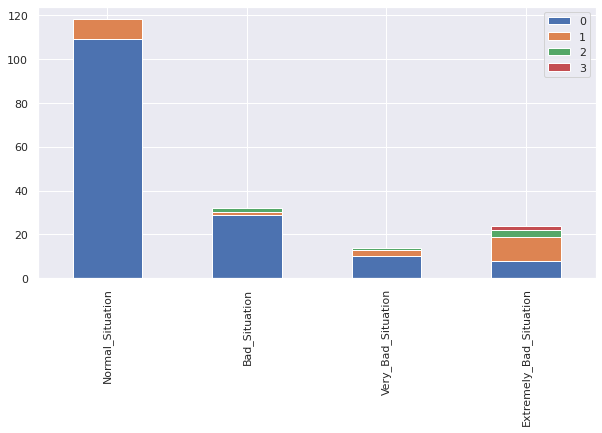

In [ ]:
bar_chart('Population')

#**Dividing the dataset**

In [ ]:
# (X_TRAIN->train_data, Y_TRAIN->target), X_TEST, Y_TEST
train_data = train.drop('New Cases', axis=1)
target = train['New Cases']
train_data.shape, target.shape

((188, 7), (188,))

#**Splitting the dataset into train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.30, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
#print(y_test)
y_test.value_counts()

X_train:  (131, 7)
X_test:  (57, 7)
y_train:  (131,)
y_test:  (57,)


0    37
3     9
1     6
2     5
Name: New Cases, dtype: int64

#**Decision Tree Algorithm 1**

In [ ]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#**Performance evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[33  4  0  0]
 [ 3  3  0  0]
 [ 2  2  0  1]
 [ 2  0  1  6]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.33      0.50      0.40         6
           2       0.00      0.00      0.00         5
           3       0.86      0.67      0.75         9

    accuracy                           0.74        57
   macro avg       0.50      0.51      0.50        57
weighted avg       0.71      0.74      0.72        57



#**Calculating accuracy**

In [ ]:
# Decision Tree 1 Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7368421052631579


#**Decision Tree Algorithm 2**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
dt2 = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(dt2, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.57894737 0.68421053 0.78947368 0.84210526 0.73684211 0.68421053
 0.42105263 0.63157895 0.77777778 0.61111111]


In [ ]:
# Decision Tree 2 Score
round(np.mean(score)*100, 2)

67.57

#**Random Forest Algorithm**

In [ ]:
# Importing Classifier Modules
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.63157895 0.63157895 0.89473684 0.78947368 0.73684211 0.73684211
 0.57894737 0.63157895 0.77777778 0.61111111]


In [ ]:
# Random Forest Score
round(np.mean(score)*100, 2)

70.2